## QQ plots

In [1]:
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from helpers import find_closest_element
from scipy.stats import norm

## CPL + Ridge

In [2]:
# read in val data
B_zeta = np.load('../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/B_zeta_val.npy')
true_z = np.load('../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/tr_labels_val.npy')
density_path = '../../data/commaai/density/gaussian_density_filtered.csv'
density = pd.read_csv(density_path)

va_ridge_dir = '../../data/commaai/va/filtered_gaussian_resampled/Ridge/'
mu_t_va = np.genfromtxt(va_ridge_dir + 'mu_t_va.csv', delimiter = ',')
beta_va = mu_t_va[0:10]

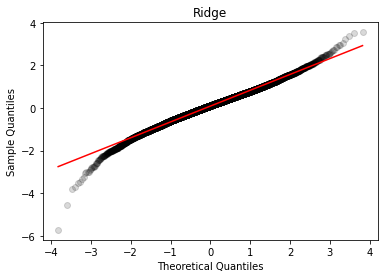

In [3]:
z_pred = (B_zeta.dot(beta_va)).reshape(10472,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.15)   
line0.set_color('black') 
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Ridge')
plt.savefig('qq_plot_cpl_ridge.png')

## CPL + Horseshoe

In [4]:
va_horse_dir = '../../data/commaai/va/filtered_gaussian_resampled/Horseshoe/'
mu_t_va = np.load(va_horse_dir + 'mu_ts2_new_dev.npy').reshape(-1, 21)
beta_horse = np.mean(mu_t_va[10000:,0:10], axis = 0)

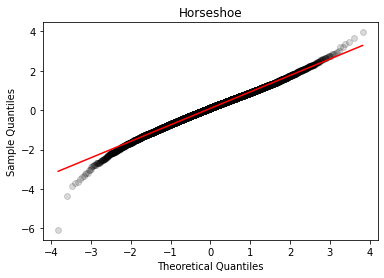

In [5]:
z_pred = (B_zeta.dot(beta_horse)).reshape(10472,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.15) 
line0.set_color('black') 
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Horseshoe')
plt.savefig('qq_plot_cpl_horse.png')

## CIL + Ridge

In [6]:
B_zeta = np.load('../../data/commaai/extracted_coefficients/20201021_unrestr_gaussian_resampled/Bzeta/B_zeta_val.npy')
true_z = np.load('../../data/commaai/extracted_coefficients/20201021_unrestr_gaussian_resampled/Bzeta/tr_labels_val.npy')
density_path = '../../data/commaai/density/gaussian_density.csv'
density = pd.read_csv(density_path)

In [7]:
mu_t_va = np.load('../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/mu_ts23_factor_50.npy')
iterations = mu_t_va.shape[0]
beta_ridge = np.mean(mu_t_va[int(0.9*iterations):iterations,0:10], axis = 0)

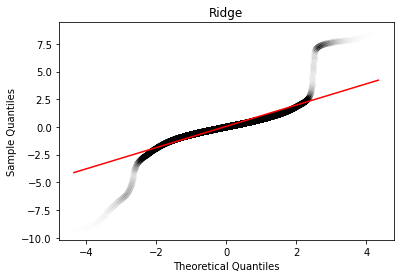

In [8]:
z_pred = (B_zeta.dot(beta_ridge)).reshape(95838,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.005)   
line0.set_color('black') 
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Ridge')
plt.savefig('qq_plot_cil_ridge.png')

In [9]:
va_horse_dir = '../../data/commaai/va/unfiltered_gaussian_resampled/Horseshoe/'
mu_t_va = np.load(va_horse_dir + 'mu_ts2_new_dev_1.npy').reshape(-1, 21)
iteration = mu_t_va.shape[0]
beta_horse = np.mean(mu_t_va[int(0.9*iteration):,0:10], axis = 0)

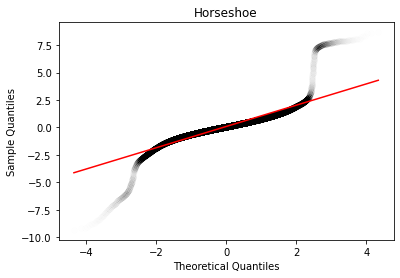

In [10]:
z_pred = (B_zeta.dot(beta_horse)).reshape(95838,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.005)
line0.set_color('black')  
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Horseshoe')
plt.savefig('qq_plot_cil_horse.png')

Quantile-quantile plots are used to visually test the normality assumption of the error terms
which we use to obtain a closed-form/known copula (=Gaussian copula bc error terms are gaussian).
For this assumption to be valid we want the plotted quantiles to be on the diagonal axis.

In [ ]:
# Paths
vartheta_path = '../../data/density/03082020/vartheta_final.csv'
B_zeta_path = '../../bdd100k_test_data/extracted_coefficients/11082020/B_zeta_predictions.csv'
z_path = '../../data/tfrecords/03082020/val_yaw_transformed.csv'
density_path = '../../data/density/03082020/density_dataframe_diffusion.csv'
checkpoint_path = '../../bdd100k_test_data/models/11082020/'
model_dir = '../../bdd100k_test_data/models/11082020'
true_y_path = '../../data/tfrecords/03082020/val_yaw_original.csv'
outfile = '../../data/plots/QQplots'

vartheta = np.genfromtxt(vartheta_path, delimiter=',')
B_zeta = np.genfromtxt(B_zeta_path, delimiter=',')
n = B_zeta.shape[0]
#true_z = np.genfromtxt(z_path, delimiter=',')[:n]
density = pd.read_csv(density_path)
true_y = np.genfromtxt(true_y_path, delimiter=',')[:n]

# p = number of betas
p = B_zeta.shape[1]

# read variational parameters
# from vector and transform to original values
beta_t = vartheta[0:p].reshape(p,)
Lambda_t_sq = np.diag(np.exp(vartheta[p:2*p].reshape(p,)))
tau_t = np.exp(vartheta[2*p])

In [ ]:
# predictions
pred = B_zeta.dot(beta_t)

In [ ]:
epsilon = true_y - pred

In [ ]:
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(epsilon, dist="norm", plot=plt)
#plt.titel("Residual QQ-plot")
plt.show()
plt.savefig(str(outfile + 'qq_plot_old_density.png'))